# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [2]:
import pandas as pd

df = pd.read_csv('vgsales.csv')

# 데이터 행 수, 열 수
print(f'행 수: {df.shape[0]}')
print(f'열 수: {df.shape[1]}')
print(f'행 정보: {df.index}')
print(f'열 정보: {df.columns}')

# 결측치
print(f'결측치: \n{df.isnull().sum()}')

행 수: 16598
열 수: 11
행 정보: RangeIndex(start=0, stop=16598, step=1)
열 정보: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
결측치: 
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [3]:
# 최소값
print(f'최소값: {int(df["Year"].min())}')

# 최대값
print(f'최대값: {int(df["Year"].max())}')

# 최빈값
print(f'최빈값: {int(df["Year"].mode()[0])}')

# 출시 연도가 없는 데이터 제거
df = df.dropna(subset=['Year'])
print(f'결측치: {df["Year"].isnull().sum()}')


최소값: 1980
최대값: 2020
최빈값: 2009
결측치: 0


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [4]:
# 고유값 목록
print(f'Platform: \n{df["Platform"].unique()}')
print()
print(f'Genre: \n{df["Genre"].unique()}')
print()
print(f'Publisher: \n{df["Publisher"].unique()}')

# Genre 종류
print(f'Genre 종류 수: \n{df["Genre"].nunique()}')

Platform: 
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Genre: 
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Publisher: 
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

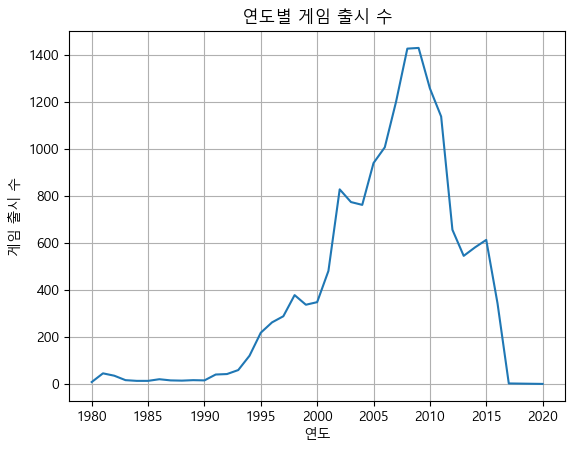

In [5]:
import matplotlib.pyplot as plt
# sort_index(): 행 인덱스 기준으로 정렬(오름차순). 데이터프레임인 경우 axis=1 열 인덱스 기준으로 정렬 가능.
df_year_games = df.groupby('Year').size().sort_index()

plt.rc('font', family='Malgun Gothic')

plt.figure()

plt.plot(
  df_year_games.index,
  df_year_games.values,
)
plt.title('연도별 게임 출시 수')
plt.xlabel('연도')
plt.ylabel('게임 출시 수')
plt.grid(True)
plt.show()

문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

Text(0, 0.5, 'Sales')

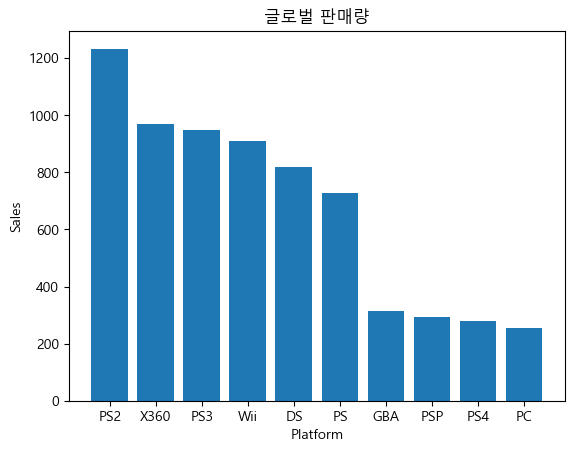

In [6]:
platform_global_sale = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)

plt.bar(
  platform_global_sale.index,
  platform_global_sale.values,
)
plt.title('글로벌 판매량')
plt.xlabel('Platform')
plt.ylabel('Sales')

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

가장 매출 높은 장르: Action
매출: 1722.88


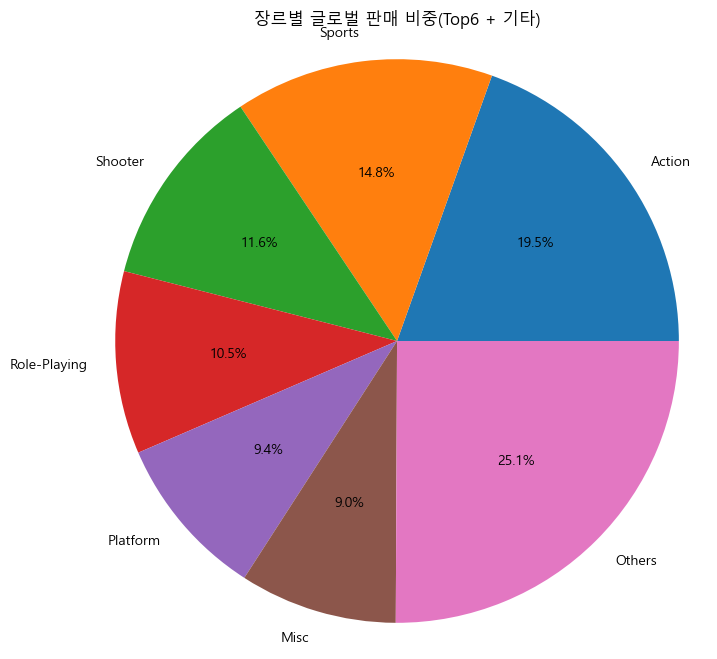

In [7]:
# 가장 높은 장르
genre_gbsales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(f'가장 매출 높은 장르: {genre_gbsales.index[0]}')
print(f'매출: {genre_gbsales.values[0]}')

# 파이차트
# => 상위 6개 장르, 나머지는 Other
top6_genres = genre_gbsales.head(6)
others = genre_gbsales.iloc[6:].sum()

pie_values = top6_genres.tolist() + [others]
pie_labels = top6_genres.index.tolist() + ['Others']

plt.figure(figsize=(8, 8))
plt.pie(
  pie_values,
  labels=pie_labels,
  autopct='%1.1f%%',
)
plt.title('장르별 글로벌 판매 비중(Top6 + 기타)')
plt.axis('equal')
plt.show()

문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [30]:
publisher_gbsales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
publisher_gbsales.head(10)


# TODO: 최소 5개 이상 발매한 Publisher만 인정
title_count = df.groupby('Publisher')['Name'].count()
title5_publisher = title_count[title_count >= 5]
# print(df_5title)
print(title5_publisher.sort_values(ascending=False).head(10))


Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Name, dtype: int64


문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

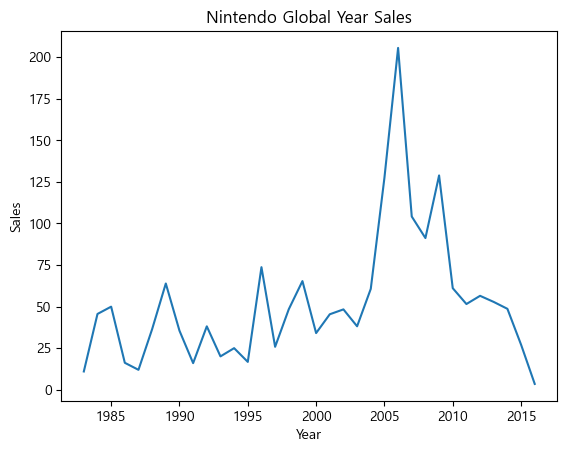

In [9]:
df_nintendo = df[df['Publisher'] == 'Nintendo']

nintendo_yearsale = df_nintendo.groupby('Year')['Global_Sales'].sum()

plt.plot(
  nintendo_yearsale.index,
  nintendo_yearsale.values,
)

plt.title('Nintendo Global Year Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

In [17]:
# Publisher, Genre 조합하여 발매 수
publisher_genre = df.groupby(['Publisher', 'Genre']).size().reset_index(name='count')

# 각 Publisher 별 발매수가 가장 많은 Genre 조회
idx = publisher_genre.groupby('Publisher')['count'].idxmax()
# => 각 Publisher 별 발매수(count)가 가장 큰 값을 가진 행의 인덱스
result = publisher_genre.loc[idx].sort_values('count', ascending=False).reset_index(drop=True)

result.head(10)

,Publisher,Genre,count
0,Electronic Arts,Sports,554
1,Activision,Action,308
2,Konami Digital Entertainment,Sports,279
3,Namco Bandai Games,Action,247
4,THQ,Action,193
5,Ubisoft,Action,193
6,Capcom,Action,154
7,Take-Two Interactive,Sports,151
8,Warner Bros. Interactive Entertainment,Action,150
9,Tecmo Koei,Action,137


문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

Text(0.5, 1.0, '지역별 총 판매량(Pie)')

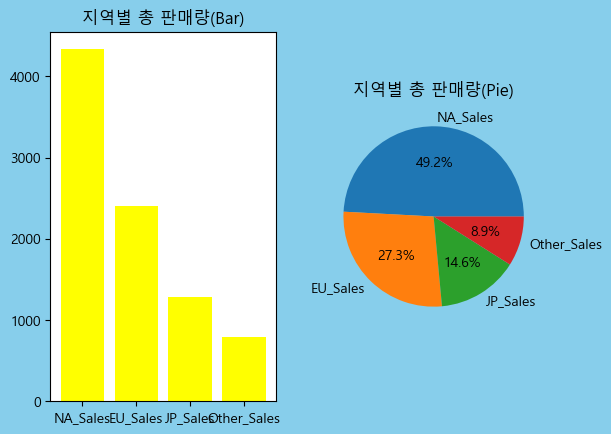

In [20]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

'''
plt.pie(
  region_sales,
  labels=region_sales.index,
  startangle=90,
  autopct='%1.f%%'
)
plt.title('Region Total Sales')
plt.axis('equal')
plt.show()
'''

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 컨테이너 배경색 설정
fig.set_facecolor('skyblue')

# bar 그래프 표시
ax1.bar(
  x=region_sales.index,
  height=region_sales,
  color='yellow',
        )
ax1.set_title('지역별 총 판매량(Bar)')

# pie 차트 표시
ax2.pie(region_sales, autopct='%1.1f%%', labels=region_sales.index)
ax2.set_title('지역별 총 판매량(Pie)')

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

In [28]:
'''
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
genre_sales['NA_Sales'].sort_values(ascending=False)
'''

# NA 국가의 판매량이 높은 장르
na_top = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(1)

# EU 국가의 판매량이 높은 장르
eu_top = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).head(1)

# JP 국가의 판매량이 높은 장르
jp_top = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(1)

print(na_top, eu_top, jp_top)


Genre
Action    861.8
Name: NA_Sales, dtype: float64 Genre
Action    516.48
Name: EU_Sales, dtype: float64 Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64


문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.

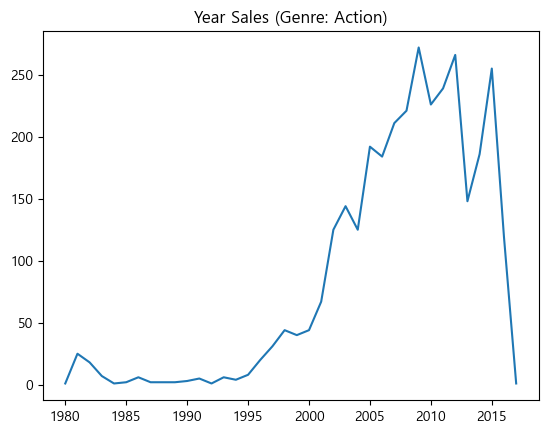

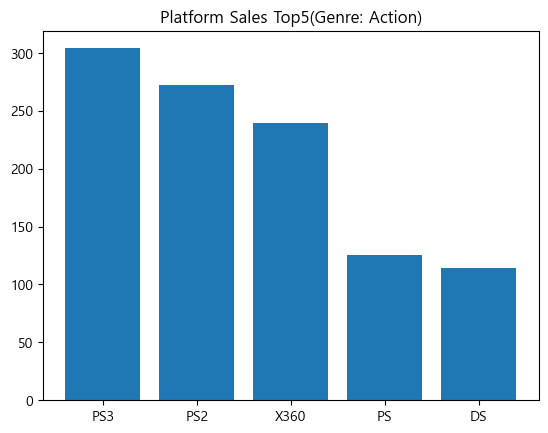

In [33]:
# 특정 장르 선택 => Action
df_action = df[df['Genre'] == 'Action']

# * 연도별 출시 수
action_year = df_action.groupby('Year').size()

# 그래프 표시(plot)
plt.plot(
  action_year.index,
  action_year.values,
)
plt.title('Year Sales (Genre: Action)')
plt.show()

# * 플랫폼별 판매량 TOP5
platform_sales = df_action.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# 그래프 표시(bar)
plt.bar(
  platform_sales.index,
  platform_sales.values,
  
)
plt.title('Platform Sales Top5(Genre: Action)')
plt.show()

